# Exercises in Data Transformation and Exploratory Data Analysis

This notebook contains the exercises for the class of February 5, 2025, in the course Data & Things at Roskilde University.

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exercise 1

Plot the number of Cinemas in Danmark over the years. The next cell loads in the needed data for you if you have the file "DK_cinemas.csv" in the same folder as this notebook. 

In [65]:
cinema_data = pd.read_csv('DK_cinemas.csv', sep=";")
years = cinema_data["Year"].tolist()
cinemas = cinema_data["Cinemas"].tolist()

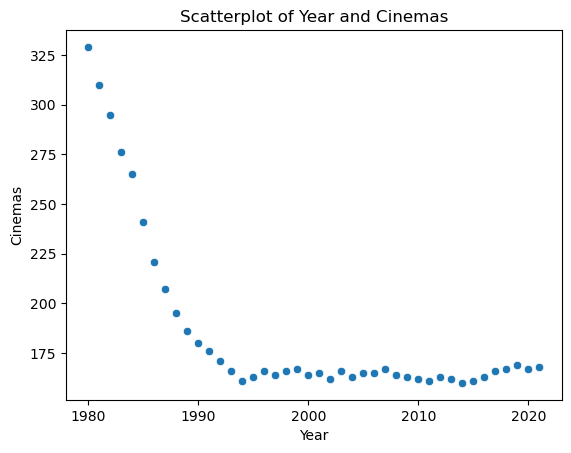

In [66]:
sns.scatterplot(data = cinema_data, x = "Year", y = "Cinemas")
plt.title("Scatterplot of Year and Cinemas")
plt.show()

## Exercise 2

In this exercise, we are going to use the `penguins` dataset from the Seaborn package. The cell below loads the data

In [67]:
penguins_data = sns.load_dataset("penguins")

In [68]:
penguins_data ##Own code

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


Based on the `Penguins` dataset, answer the following questions:

1. Make a barplot that shows how many penguins there are of each species in the dataset. Support the plot by calculating the numbers.
2. Make a barplot that shows the average body mass for each species of penguin. Support the plot by calculating the numbers
3. Make a boxplots that shows the distribution of the body mass for each species of penguin. Support the plot by calculating the numbers.
4. Make a scatterplot that shows the correlation between body mass (in g) and flipper length (in mm). Support the plot by calculating the numbers.
5. Use boxplots and histograms to show how bill length, bill depth, flipper length and body mass varies between species and sex.
6. Visualise how the linear correlation between body mass and flipper length varies between species and sex.

#### 1. Make a barplot that shows how many penguins there are of each species in the dataset. Support the plot by calculating the numbers.

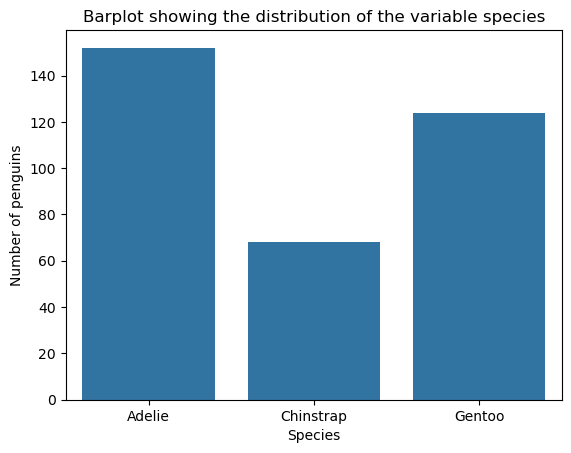

In [69]:
sns.countplot(x = "species", data = penguins_data)
plt.title("Barplot showing the distribution of the variable species")
plt.xlabel("Species")
plt.ylabel("Number of penguins")
plt.show()

In [70]:
penguins_data["species"].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

#### 2. Make a barplot that shows the average body mass for each species of penguin. Support the plot by calculating the numbers

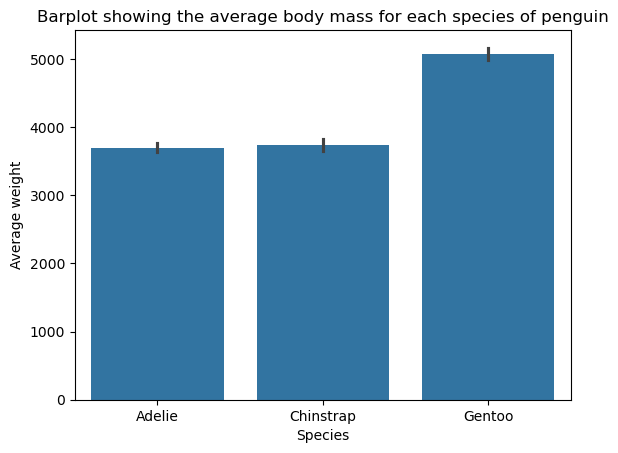

In [71]:
sns.barplot(data=penguins_data, x="species", y="body_mass_g") ##Using default estimator,  
plt.title("Barplot showing the average body mass for each species of penguin")
plt.xlabel("Species")
plt.ylabel("Average weight")
plt.show()

In [72]:
grouped_data = penguins_data[["species", "body_mass_g"]].groupby("species");
grouped_data.mean()

,body_mass_g
species,
Adelie,3700.662252
Chinstrap,3733.088235
Gentoo,5076.016260


#### 3. Make a boxplots that shows the distribution of the body mass for each species of penguin. Support the plot by calculating the numbers.

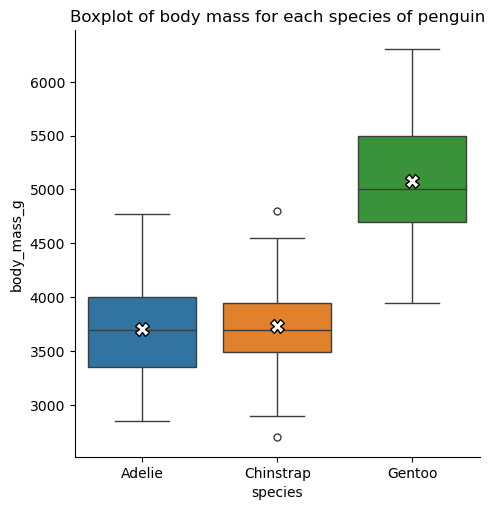

In [73]:
sns.catplot(x="species", y = "body_mass_g", hue = "species", data = penguins_data, kind="box",
            showmeans=True,
            meanprops={"marker":"X", "markerfacecolor":"white", "markeredgecolor":"black", "markersize": "10"})
plt.title("Boxplot of body mass for each species of penguin")
plt.show()

In [74]:
weight_by_species = penguins_data["body_mass_g"].groupby(penguins_data["species"]).describe()
weight_by_species["median"] = penguins_data["body_mass_g"].groupby(penguins_data["species"]).median()
weight_by_species

,count,mean,std,min,25%,50%,75%,max,median
species,,,,,,,,,
Adelie,151.0,3700.662252,458.566126,2850.0,3350.0,3700.0,4000.0,4775.0,3700.0
Chinstrap,68.0,3733.088235,384.335081,2700.0,3487.5,3700.0,3950.0,4800.0,3700.0
Gentoo,123.0,5076.016260,504.116237,3950.0,4700.0,5000.0,5500.0,6300.0,5000.0


#### 4. Make a scatterplot that shows the correlation between body mass (in g) and flipper length (in mm). Support the plot by calculating the numbers.

Text(0, 0.5, 'Flipper length (in mm)')

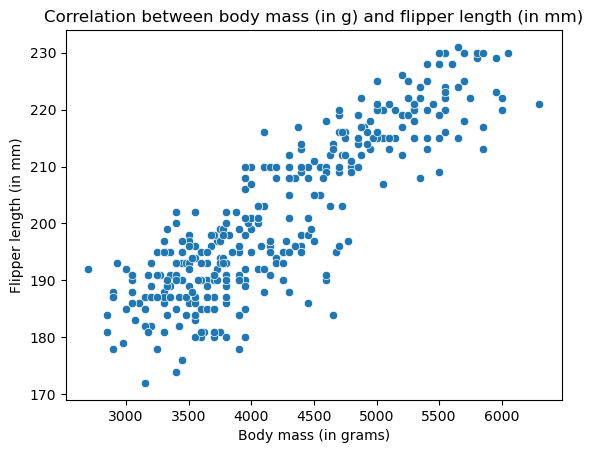

In [75]:
sns.scatterplot(data = penguins_data, x = "body_mass_g", y = "flipper_length_mm")

plt.title("Correlation between body mass (in g) and flipper length (in mm)")
plt.xlabel("Body mass (in grams)")
plt.ylabel("Flipper length (in mm)")

In [76]:
penguins_data["body_mass_g"].corr(penguins_data["flipper_length_mm"])

np.float64(0.8712017673060114)

#### 5. Use boxplots and histograms to show how bill length, bill depth, flipper length and body mass varies between species and sex.

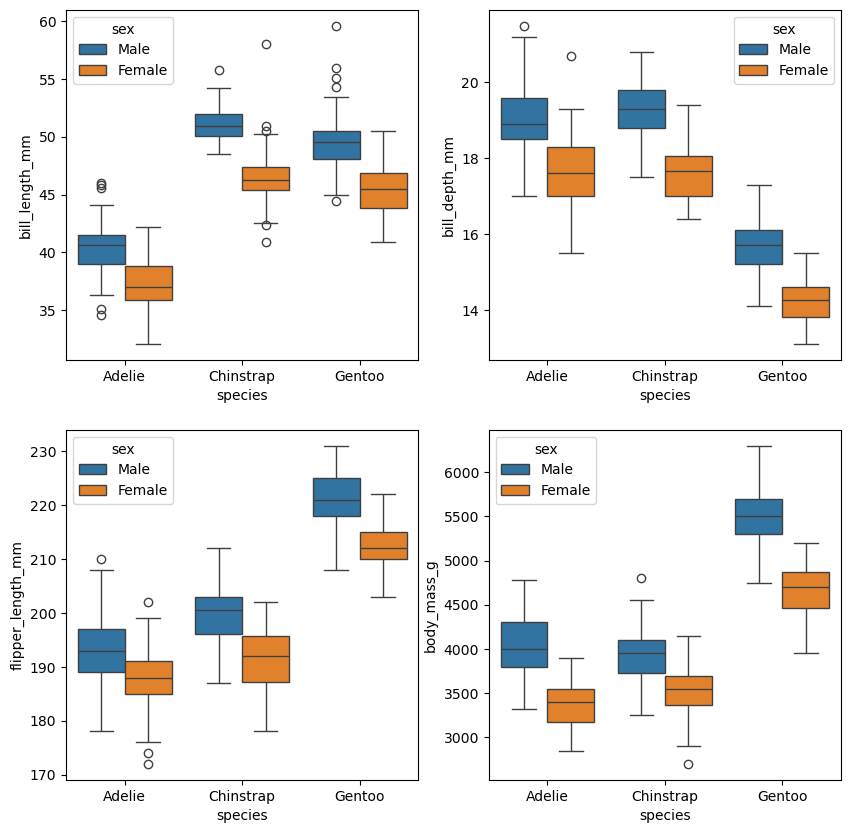

In [77]:
features = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten() ## flattens axis array, from 2d to 1D. So it can be used in loop
for i, feature in enumerate(features): ##Enumerate gives both "feature" and its index
    sns.boxplot(data = penguins_data, x = "species", y = feature, hue = "sex", ax=axes[i])


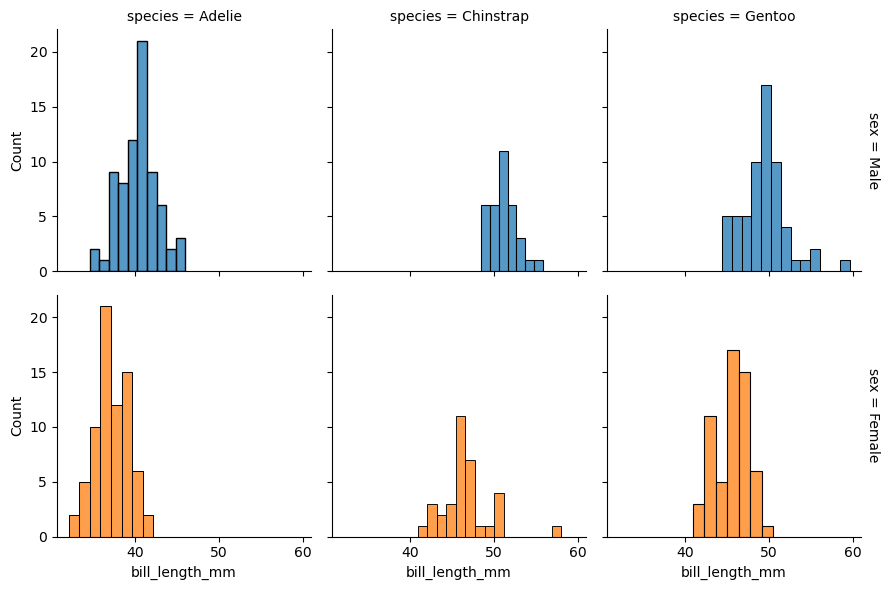

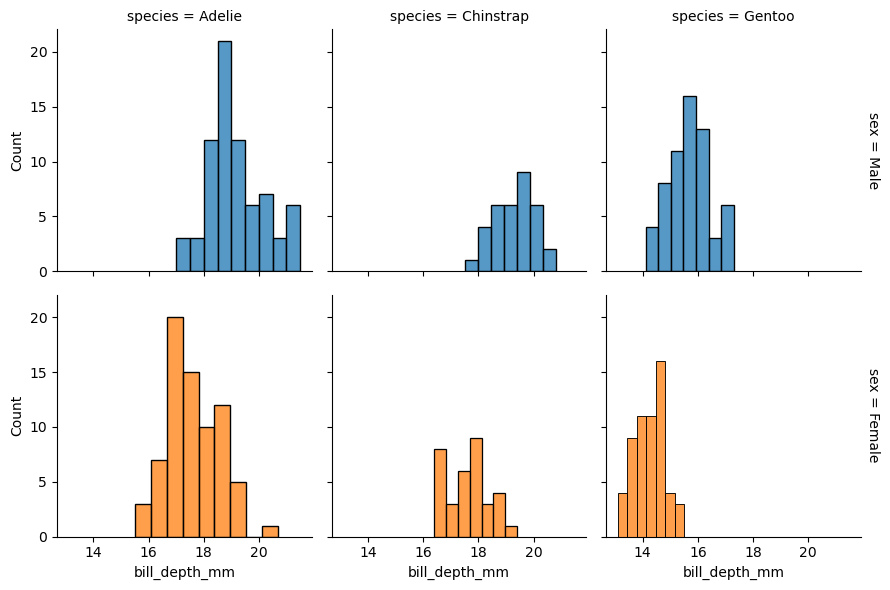

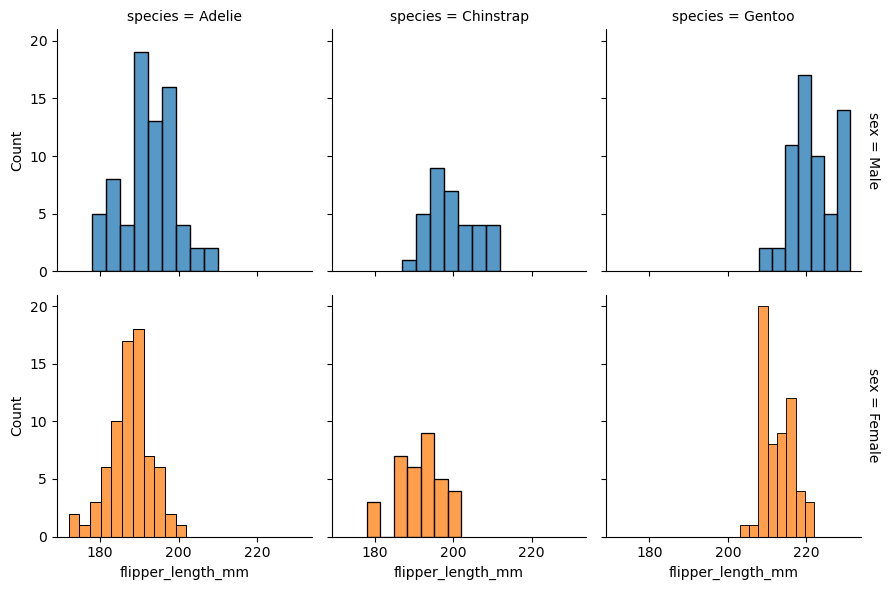

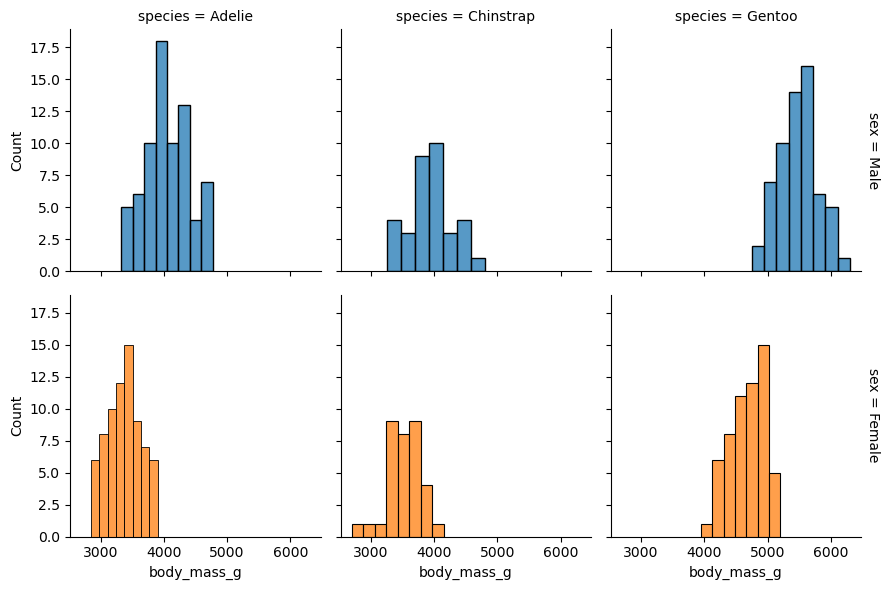

In [78]:
features = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]


for f in features:
    g = sns.FacetGrid(penguins_data, col="species", row="sex", hue = "sex", margin_titles=True) ##Margin titles add sex to right side
    g.map_dataframe(sns.histplot, x=f)
plt.show()


#### 6. Visualise how the linear correlation between body mass and flipper length varies between species and sex.

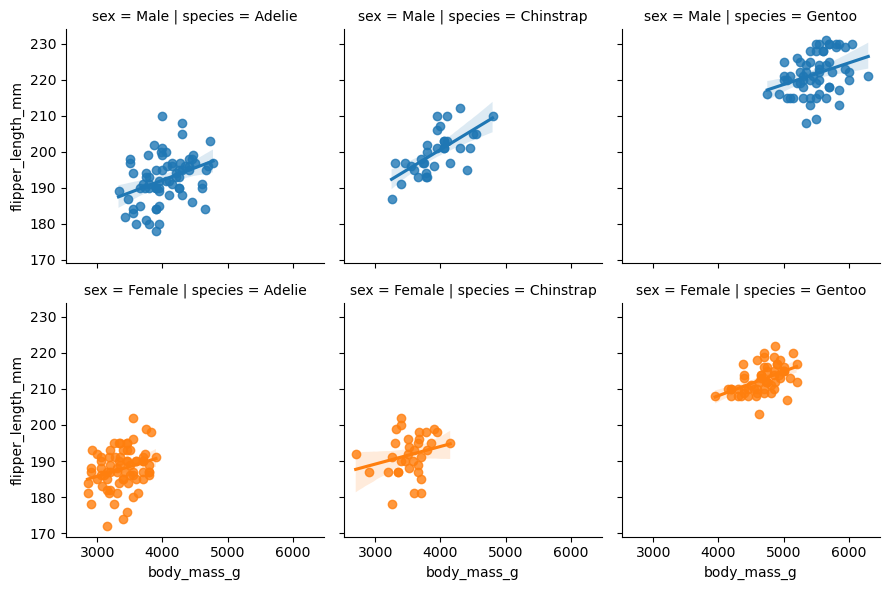

In [79]:
g = sns.FacetGrid(penguins_data, col="species", row="sex", hue = "sex") ##Margin titles add sex to right side
g.map_dataframe(sns.regplot, x="body_mass_g", y="flipper_length_mm")
plt.show()

## Exercise 3 -- Select and compare variables, both numerical, categorical and combination of both

Do an exploratory data analysis of the adult dataset. The cell below loads the dataset from UCI Machine Learning Repository into a pandas dataframe called `adult_data`. It requires that you have installed the package `ucimlrepo`. (Otherwise the dataset is on model for this class.)

In [80]:
from ucimlrepo import fetch_ucirepo 
adult = fetch_ucirepo(id=2) 
X = adult.data.features 
y = adult.data.targets 
X["income"] = y
adult_data = X.copy()

adult_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [81]:
# Checking for missing values
adult_data.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [82]:
adult_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [83]:
adult_data["income"].value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

Unifying the income:

In [84]:
adult_data["income"] = adult_data["income"].replace({"<=50K." : "<=50K", ">50K.": ">50K"})

In [85]:
adult_data["income"].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64


##### Age and income

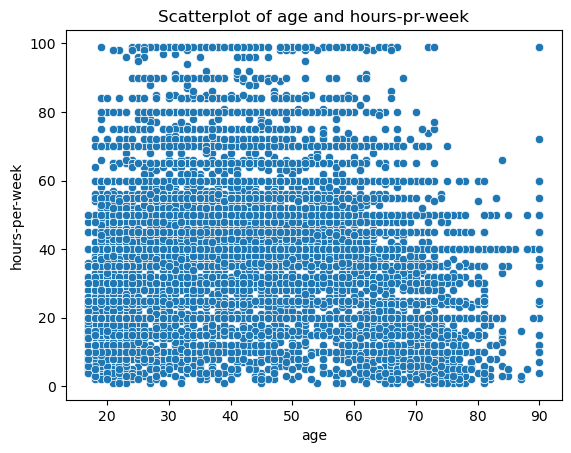

In [86]:
sns.scatterplot(data = adult_data, x = "age", y = "hours-per-week")
plt.title("Scatterplot of age and hours-pr-week")
plt.show()

In [87]:
adult_data["age"].corr(adult_data["hours-per-week"])

np.float64(0.07155833852698382)

##### hours-pr-week, by sex and marital status

In [88]:
adult_data["age"].agg(["min", "max"])

min    17
max    90
Name: age, dtype: int64

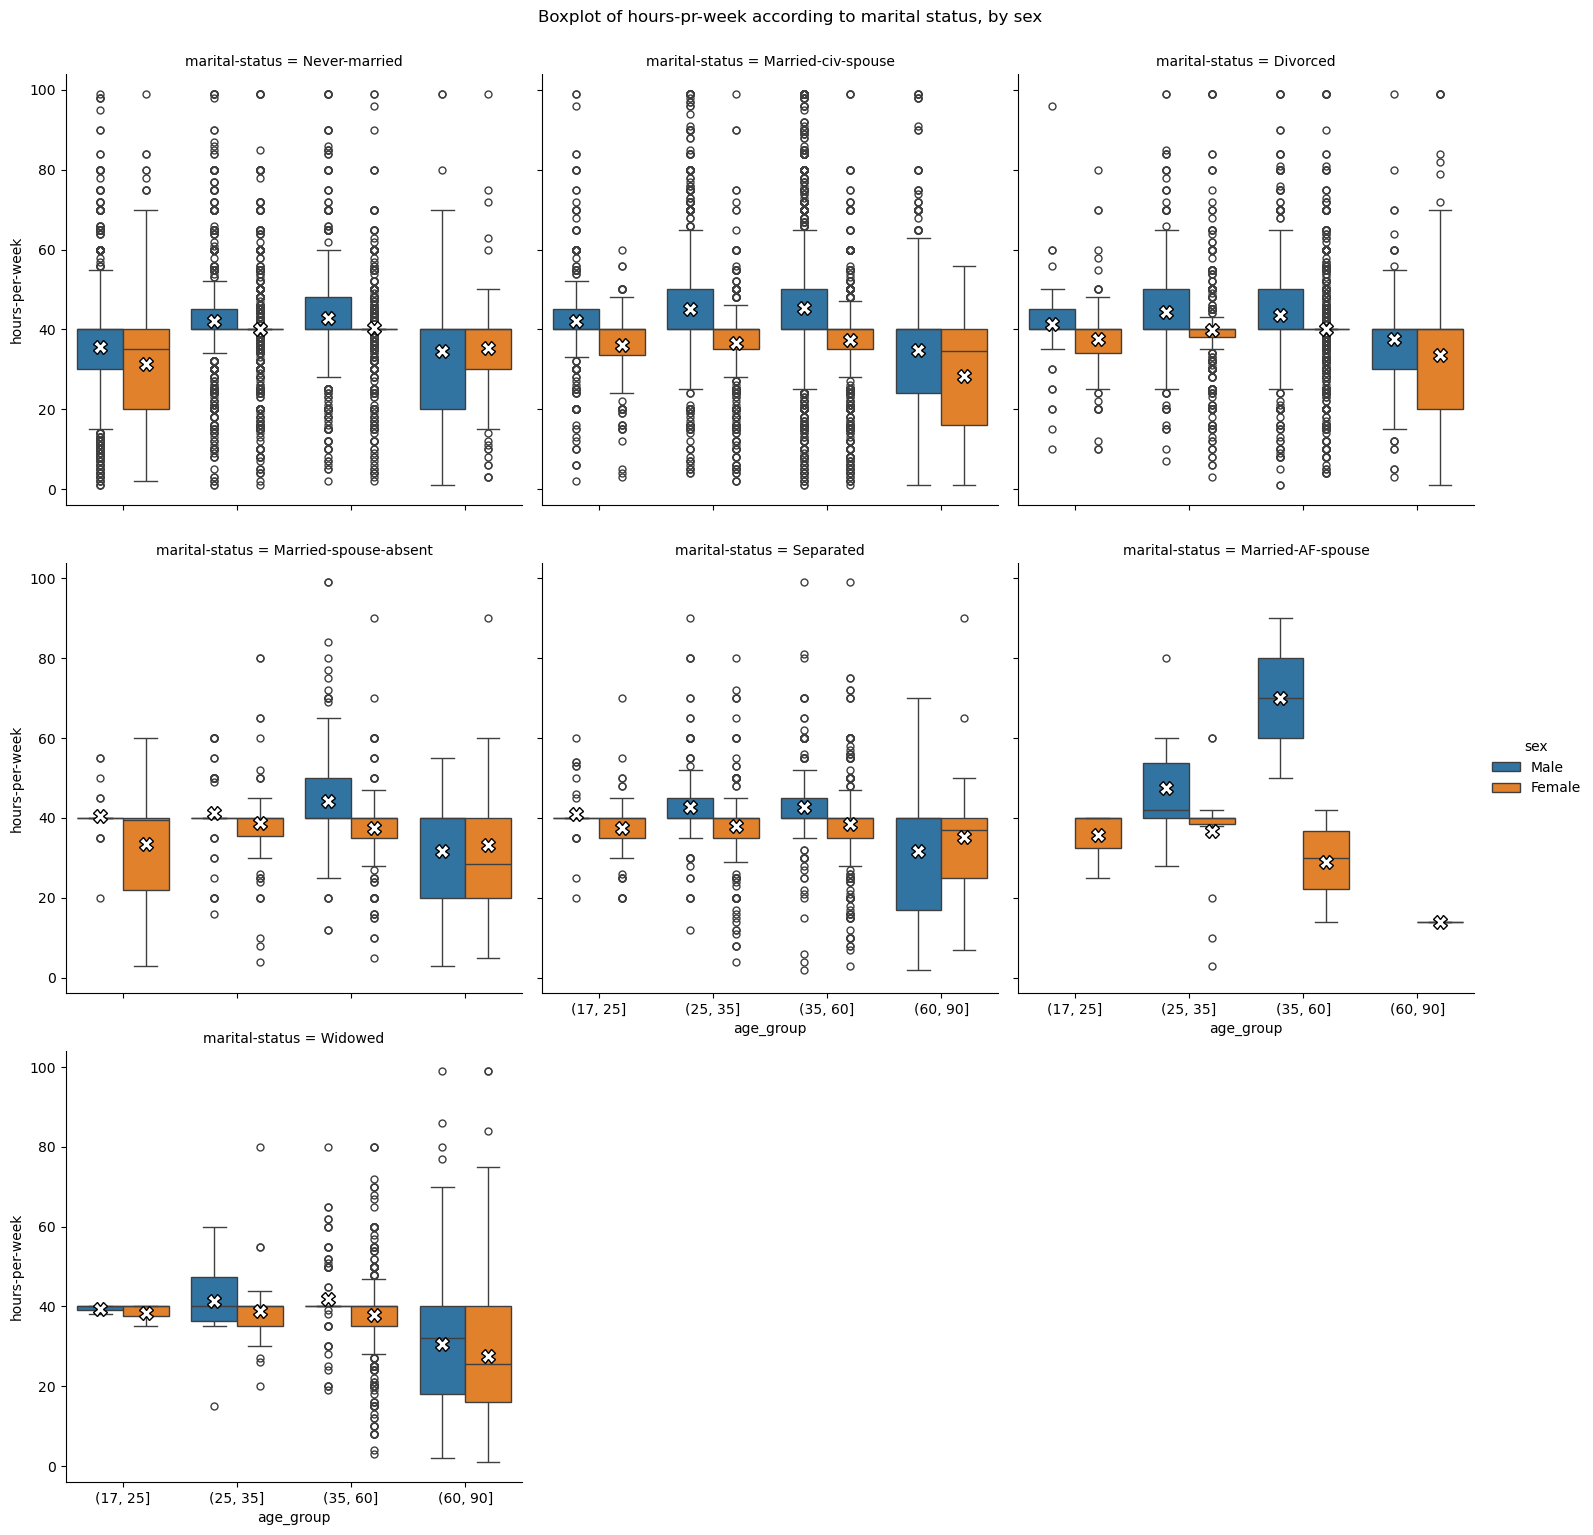

In [89]:
adult_data["age"].min()
adult_data["age_group"] = pd.cut(adult_data["age"], bins = [17, 25, 35, 60, 90])

g = sns.catplot(x="age_group", y = "hours-per-week", hue = "sex", col="marital-status", col_wrap=3, data = adult_data, kind="box",
            showmeans=True,
            meanprops={"marker":"X", "markerfacecolor":"white", "markeredgecolor":"black", "markersize": "10"})
g.fig.suptitle("Boxplot of hours-pr-week according to marital status, by sex", y=1.02)
plt.show()

In [90]:
hpw_by_age_sex = adult_data["hours-per-week"].groupby([adult_data["marital-status"], adult_data["sex"],adult_data["age_group"]]).describe()
hpw_by_age_sex

C:\Users\Jacob\AppData\Local\Temp\ipykernel_3724\4077084847.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hpw_by_age_sex = adult_data["hours-per-week"].groupby([adult_data["marital-status"], adult_data["sex"],adult_data["age_group"]]).describe()


count       mean        std   min  \
marital-status        sex    age_group                                        
Divorced              Female (17, 25]     127.0  37.551181  10.132228  10.0   
                             (25, 35]     851.0  39.763807  10.400765   3.0   
                             (35, 60]    2751.0  40.138859   9.581553   4.0   
                             (60, 90]     272.0  33.639706  16.048668   1.0   
                      Male   (17, 25]      68.0  41.441176  11.118604  10.0   
                             (25, 35]     620.0  44.456452  10.592147   7.0   
                             (35, 60]    1812.0  43.698675  10.447985   1.0   
                             (60, 90]     132.0  37.696970  14.328181   3.0   
Married-AF-spouse     Female (17, 25]       6.0  35.833333   6.645801  25.0   
                             (25, 35]      14.0  36.642857  15.978867   3.0   
                             (35, 60]       4.0  29.000000  12.192894  14.0   
                             (60, 90]       1.0  14.000000        NaN  14.0   
                      Male   (25, 35]      10.0  47.500000  14.630638  28.0   
                             (35, 60]       2.0  70.000000  28.284271  50.0   
Married-civ-spouse    Female (17, 25]     231.0  36.155844   9.108617   3.0   
                             (25, 35]     748.0  36.696524  11.519968   2.0   
                             (35, 60]    1380.0  37.315217  12.242056   1.0   
                             (60, 90]     120.0  28.408333  14.298437   1.0   
                      Male   (17, 25]     764.0  42.099476  10.484741   2.0   
                             (25, 35]    4818.0  45.163553  10.360145   4.0   
                             (35, 60]   12302.0  45.399772  10.979543   1.0   
                             (60, 90]    2014.0  34.817279  15.300837   1.0   
Married-spouse-absent Female (17, 25]      44.0  33.454545  11.799595   3.0   
                             (25, 35]      87.0  38.770115  11.493882   4.0   
                             (35, 60]     155.0  37.580645  11.122033   5.0   
                             (60, 90]      18.0  33.277778  19.595334   5.0   
                      Male   (17, 25]      29.0  40.517241   6.173797  20.0   
                             (25, 35]      86.0  41.220930   8.730476  16.0   
                             (35, 60]     183.0  44.262295  12.379842  12.0   
                             (60, 90]      25.0  31.720000  14.954152   3.0   
Never-married         Female (17, 25]    3503.0  31.391093  11.680892   2.0   
                             (25, 35]    2058.0  39.992225  10.225410   1.0   
                             (35, 60]    1259.0  40.229547   9.720607   2.0   
                             (60, 90]     104.0  35.403846  14.933847   3.0   
                      Male   (17, 25]    4135.0  35.559371  12.077952   1.0   
                             (25, 35]    2904.0  42.200069  10.273939   1.0   
                             (35, 60]    1456.0  42.766484  10.933998   2.0   
                             (60, 90]     107.0  34.560748  18.404356   1.0   
Separated             Female (17, 25]      76.0  37.460526   8.103400  20.0   
                             (25, 35]     276.0  37.981884  10.177499   4.0   
                             (35, 60]     550.0  38.445455  10.061366   3.0   
                             (60, 90]      29.0  35.275862  15.572174   7.0   
                      Male   (17, 25]      43.0  40.930233   6.863969  20.0   
                             (25, 35]     202.0  42.698020   9.902655  12.0   
                             (35, 60]     328.0  42.643293   9.700289   2.0   
                             (60, 90]      26.0  31.615385  16.272866   2.0   
Widowed               Female (17, 25]       3.0  38.333333   2.886751  35.0   
                             (25, 35]      35.0  38.971429   9.894995  20.0   
                             (35, 60]     591.0  37.947547  10.539464   3.0   
             

In [91]:
ct_data = pd.crosstab(adult_data["marital-status"], adult_data["sex"])
ct_data

sex,Female,Male
marital-status,,
Divorced,4001,2632
Married-AF-spouse,25,12
Married-civ-spouse,2480,19899
Married-spouse-absent,304,324
Never-married,7218,8899
Separated,931,599
Widowed,1233,285


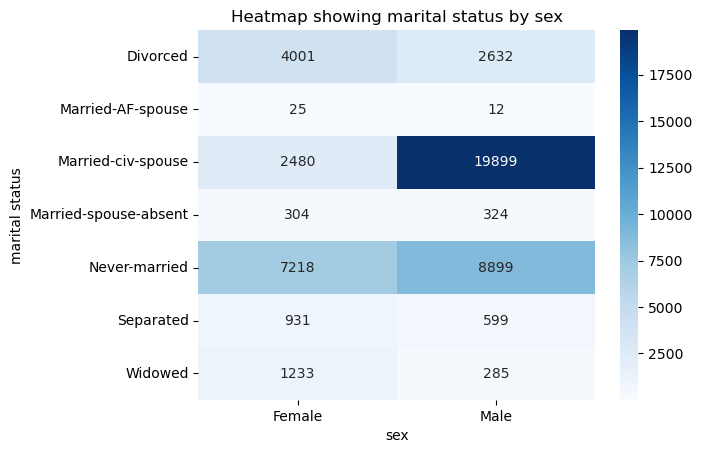

In [92]:
sns.heatmap(ct_data, annot=True, fmt="d", cmap="Blues")

plt.title("Heatmap showing marital status by sex")
plt.xlabel("sex")
plt.ylabel("marital status")

plt.show()


In [93]:
ms_by_sex = adult_data["sex"].groupby(adult_data["marital-status"])
ms_by_sex.value_counts()


marital-status         sex   
Divorced               Female     4001
                       Male       2632
Married-AF-spouse      Female       25
                       Male         12
Married-civ-spouse     Male      19899
                       Female     2480
Married-spouse-absent  Male        324
                       Female      304
Never-married          Male       8899
                       Female     7218
Separated              Female      931
                       Male        599
Widowed                Female     1233
                       Male        285
Name: count, dtype: int64

<Axes: xlabel='sex'>

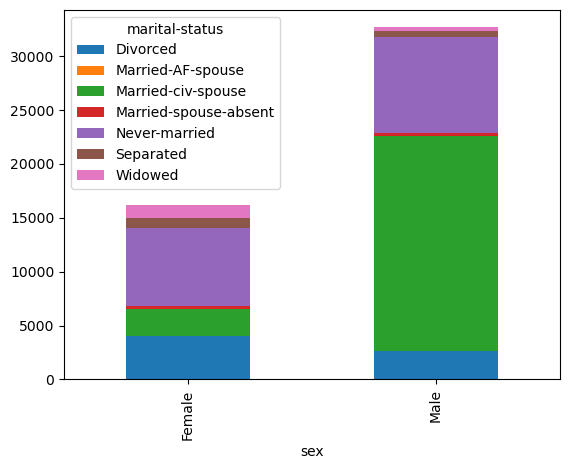

In [94]:
pd.crosstab(adult_data["sex"], adult_data["marital-status"]).plot(kind="bar", stacked=True)

## Exercise 4

Complete an exploratory data analysis of the titanic dataset (it is on moodle). (Remember, you can load it in as `titanic_data = pd.read_csv("titanic_survival_data.csv")`)

In [95]:
titanic_data = pd.read_csv("titanic_survival_data.csv")
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.250,S
1,1,1,female,38.0,1,0,712.833,C
2,1,3,female,26.0,0,0,7.925,S
3,1,1,female,35.0,1,0,53.100,S
4,0,3,male,35.0,0,0,8.050,S


In [96]:
titanic_data.shape #showing num of col and rows

(891, 8)

In [97]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      868 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [98]:
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,868.000000
mean,0.383838,2.308642,29.679272,0.523008,0.381594,91.288425
std,0.486592,0.836071,14.536483,1.102743,0.806057,159.991488
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.000000,0.000000,0.000000,10.500000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,27.825000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,78.958000
max,1.000000,3.000000,80.000000,8.000000,6.000000,910.792000


In [99]:
titanic_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare         23
Embarked      2
dtype: int64

In [100]:
titanic_data[titanic_data["Age"].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,NaN,0,0,84.583,Q
17,1,2,male,NaN,0,0,13.000,S
19,1,3,female,NaN,0,0,7.225,C
26,0,3,male,NaN,0,0,7.225,C
28,1,3,female,NaN,0,0,78.792,Q
...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,72.292,C
863,0,3,female,NaN,8,2,69.550,S
868,0,3,male,NaN,0,0,9.500,S
878,0,3,male,NaN,0,0,78.958,S


###### Picks random ages and insert those val in the NaN fields. Using seed, to verify reproducability

In [101]:
fake_ages = titanic_data['Age'].dropna().sample(titanic_data['Age'].isnull().sum(), random_state=1337)
fake_ages

33     66.0
271    25.0
134    25.0
14     14.0
588    22.0
       ... 
122    32.0
59     11.0
171     4.0
618     4.0
840    20.0
Name: Age, Length: 177, dtype: float64

In [102]:
titanic_data.loc[titanic_data["Age"].isnull(), "Age"] = fake_ages
fake_ages

33     66.0
271    25.0
134    25.0
14     14.0
588    22.0
       ... 
122    32.0
59     11.0
171     4.0
618     4.0
840    20.0
Name: Age, Length: 177, dtype: float64

## Exercise 5

Do an exploratory data analysis of the diabetes dataset. The cell below loads the dataset from the scikit learn package into the pandas dataframe called `diabetes_data`.

In [103]:
from sklearn.datasets import load_diabetes
d_data = load_diabetes(as_frame=True)
diabetes_data = d_data.data
diabetes_data["Target"] = d_data.target

diabetes_data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0
